<a href="https://colab.research.google.com/github/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/Assignment_1_solution_678.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.spatial.distance import pdist
import requests
from io import StringIO
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')


np.random.seed(42)

# Problem 1: High-Dimensional Distance Analysis [6 points]

**Task:** For each dimension d ∈ [2¹, 2³, 2⁵, ..., 2¹¹], sample 100 random points from corresponding vector spaces and:
- Record the L2 and cosine distances between all pairs
- Fit two normal/Gaussian distributions, one for each distance metric
- Share the mean (μ) and standard deviation (σ) parameters
- Plot these normal/Gaussian distributions

In [2]:
print("PROBLEM 1: High-Dimensional Distance Analysis")
print("="*50)

# dimensions as specified: 2^1, 2^3, 2^5, ..., 2^11
dimensions = [2**i for i in range(2, 12, 2)]  # [2, 8, 32, 128, 512, 2048]
n_samples = 100

print(f"Dimensions to process: {dimensions}")
print(f"Number of samples per dimension: {n_samples}")
print(f"Using sample code: np.random.randn(n, d)")

# Storage for results
results_table = []

PROBLEM 1: High-Dimensional Distance Analysis
Dimensions to process: [4, 16, 64, 256, 1024]
Number of samples per dimension: 100
Using sample code: np.random.randn(n, d)


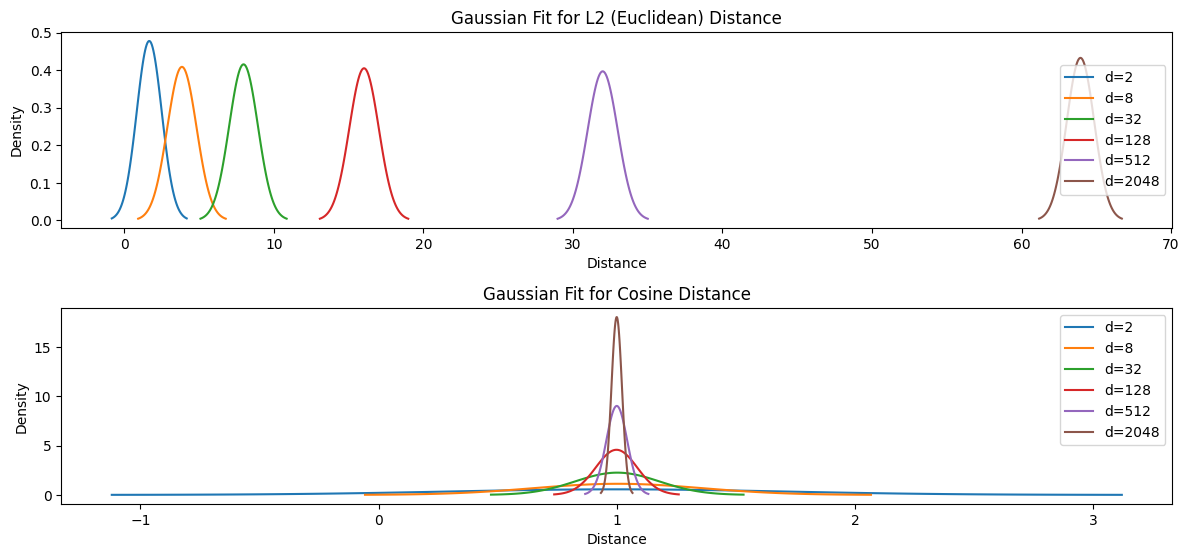

Dimension: 2, Metric: L2 (Euclidean), Mean: 1.6627, Std Dev: 0.8351
Dimension: 2, Metric: Cosine, Mean: 1.0003, Std Dev: 0.7068
Dimension: 8, Metric: L2 (Euclidean), Mean: 3.8498, Std Dev: 0.9758
Dimension: 8, Metric: Cosine, Mean: 1.0053, Std Dev: 0.3541
Dimension: 32, Metric: L2 (Euclidean), Mean: 7.9704, Std Dev: 0.9601
Dimension: 32, Metric: Cosine, Mean: 1.0022, Std Dev: 0.1767
Dimension: 128, Metric: L2 (Euclidean), Mean: 16.0292, Std Dev: 0.9848
Dimension: 128, Metric: Cosine, Mean: 0.9989, Std Dev: 0.0872
Dimension: 512, Metric: L2 (Euclidean), Mean: 31.9889, Std Dev: 1.0050
Dimension: 512, Metric: Cosine, Mean: 1.0001, Std Dev: 0.0442
Dimension: 2048, Metric: L2 (Euclidean), Mean: 63.9432, Std Dev: 0.9218
Dimension: 2048, Metric: Cosine, Mean: 0.9999, Std Dev: 0.0221


In [3]:
# Importing our datasets
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

# Formular for the two distances
def l2_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


def cosine_distance(x, y):
    return 1 - (np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))

# Dimensionality Scaling
dimensions = np.power(2,np.arange(1,12,2))  # d = 2^1, 2^3, ..., 2^11
num_samples = 100

distance_metrics = {
    "L2 (Euclidean)": [],
    "Cosine": []
}

results = {}

for d in dimensions:
    samples = np.random.randn(num_samples, d)  # Generate random points

    # Compute pairwise distances using itertools
    l2_distances = [l2_distance(x, y) for x, y in itertools.combinations(samples, 2)]
    cosine_distances = [cosine_distance(x, y) for x, y in itertools.combinations(samples, 2)]

    # Fit Gaussian distributions
    for name, distances in zip(distance_metrics.keys(), [l2_distances, cosine_distances]):
        mu, sigma = np.mean(distances), np.std(distances)
        results[(d, name)] = (mu, sigma)
        distance_metrics[name].append((d, distances, mu, sigma))

# Plot the distributions
plt.figure(figsize=(12, 8))
for idx, (metric, data) in enumerate(distance_metrics.items()):
    plt.subplot(3, 1, idx + 1)
    for d, distances, mu, sigma in data:
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f'd={d}')
    plt.title(f'Gaussian Fit for {metric} Distance')
    plt.xlabel('Distance')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Print results
for (d, metric), (mu, sigma) in results.items():
    print(f"Dimension: {d}, Metric: {metric}, Mean: {mu:.4f}, Std Dev: {sigma:.4f}")

Distance analysis in the 'cosine' space

## Problem 2

# Problem 2: Probability with Replacement [6 points]

**Scenario:** Orange and green balls in two boxes (red and blue). Person picks balls twice with replacement.

**Tasks:**
- (a) What is the log-probability that the first ball is orange and the second ball is green?
- (b) What is the probability that the ball was drawn from the red box in both trials described in part (a)?

**Assumptions:** Box selection follows uniform distribution (person is blindfolded)

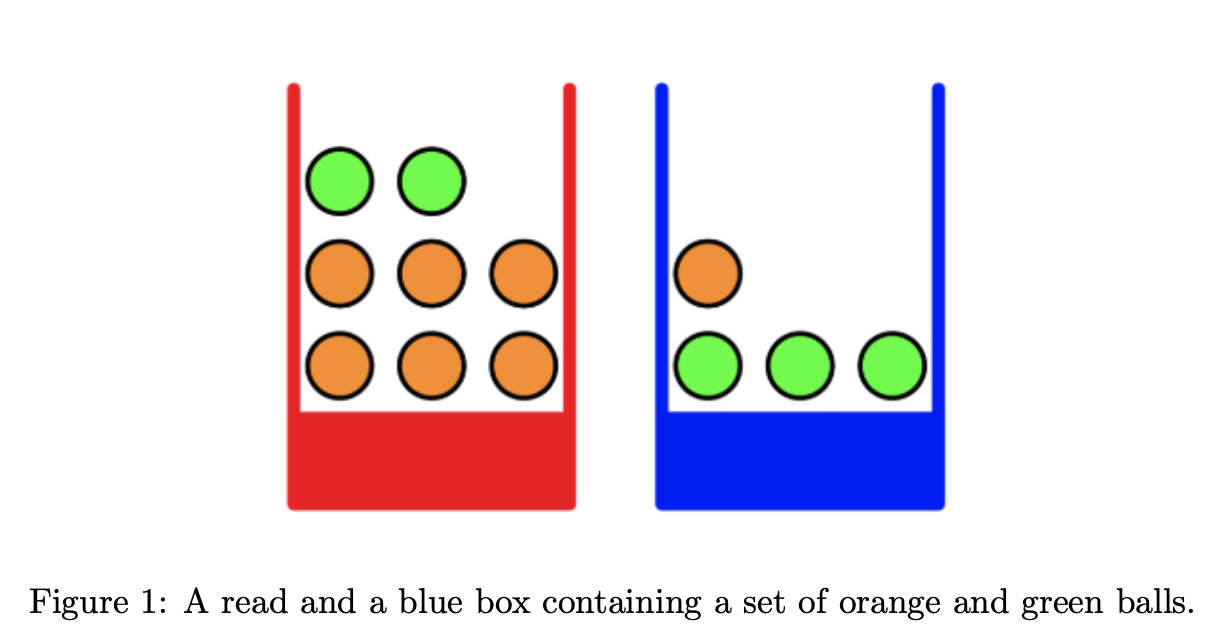

## Solution

**(a)** What is the log-probability that the first ball is orange and the **second** ball is green?

In [4]:
import math
# Probabilities of Orange/Green given each box
p_O_R, p_G_R = 3/4, 1/4   # Red box
p_O_B, p_G_B = 1/4, 3/4   # Blue box

# Box selection probability (uniform: 50%-50%)
p_R = p_B = 0.5


# (a) Probability first draw Orange, second draw Green

# Marginal probability of Orange
p_O = p_R * p_O_R + p_B * p_O_B
# Marginal probability of Green
p_G = p_R * p_G_R + p_B * p_G_B

# Since draws are independent with replacement:
p_O_then_G = p_O * p_G
log_prob = math.log(p_O_then_G)  # natural log

print(f"(a) P(O then G) = {p_O_then_G:.4f}")
print(f"(a) log P(O then G) = {log_prob:.4f}")

(a) P(O then G) = 0.2500
(a) log P(O then G) = -1.3863


**(b)** What is the probability that the ball was drawn from the red box in both trials described in part **(a)**?


In [5]:

# (b) Probability both draws were from the red box given O then G

# Numerator: probability of choosing Red both times and seeing O then G
num = p_R * p_O_R * p_R * p_G_R
# Denominator: total probability of O then G
den = p_O_then_G
# Posterior (Bayes rule)
posterior = num / den

# Results
print(f"(b) P(both from Red | O,G) = {posterior:.4f}")

(b) P(both from Red | O,G) = 0.1875


# Problem 3: Third-Degree Polynomial Regression [9 points]

**Model:** y = β₀ + β₁x + β₂x² + β₃x³  
**Parameters:** Θ = {β₀, β₁, β₂, β₃}  
**Loss Function:** Quadratic loss (squared error)  
**Initial Parameters:** Θ₀ = {β₀ = 0.0, β₁ = 0.0, β₂ = 1.0, β₃ = 1.0}  

**Tasks:**
- (a) Estimate the ℓ₂ error before training begins
- (b) Updated value of Θ after 2 iterations of gradient descent  
- (c) Compute the ℓ₂ error after the 3rd iteration

## Solution

In [6]:
url = "https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/miscellaneous/third_degree_polynomial_regression_data.csv"
df = pd.read_csv(url)
df.head()

,x_0,x_1,x_2,x_3,y
0,1.0,-0.970478,0.941828,-0.914023,1.221212
1,1.0,-0.868166,0.753712,-0.654347,-2.271333
2,1.0,-1.909401,3.645812,-6.961317,3.964091
3,1.0,0.730079,0.533015,0.389143,-1.182732
4,1.0,0.077110,0.005946,0.000458,-1.645366


In [7]:
x = df.x_1.values
y = df.y.values

In [10]:
beta_0, beta_1, beta_2, beta_3 = beta_init = [0.0,0.0, 1, 1.0]
learning_rate = 0.01
epochs = 100
n = float(len(x))

y_hat_list = []
loss_list = []
betas_list = []

for i in range(epochs):

    y_hat = beta_0 + beta_1*x + beta_2*x**2 + beta_3*x**3
    # Displaying losses
    loss = np.sum((y_hat - y)**2)
    print(loss)
    loss_list.append(loss)
    y_hat_list.append(y_hat)

    # Gradient updates
    beta_0 = beta_0 - learning_rate * (2/n) * sum((y_hat - y))
    beta_1 = beta_1 - learning_rate * (2/n) * sum((y_hat - y) * x)
    beta_2 = beta_2 - learning_rate * (2/n) * sum((y_hat - y ) * x**2)
    beta_3 = beta_3 - learning_rate * (2/n) * sum((y_hat - y ) * x**3)

    betas = [beta_0,beta_1,beta_2, beta_3]
    betas_list.append(betas)

47695.278665853344
16416.16314339727
7536.342569686121
4931.907126010607
4097.181945321126
3771.2349666418286
3599.6332167167175
3481.452660246805
3386.878474237433
3306.220041381103
3235.6299912119794
3173.0795272928954
3117.203752211051
3066.95348804448
3021.476552468019
2980.06665880536
2942.1341642460743
2907.1853940751853
2874.806426829209
2844.6498498506107
2816.4237840077503
2789.8827438505327
2764.8200134885064
2741.061283137681
2718.4593367352236
2696.8896165828887
2676.246520000218
2656.440307006963
2637.3945180680703
2619.04381762629
2601.3321930764932
2584.2114504616984
2567.6399578749697
2551.5815956516453
2536.0048791979034
2520.882225945751
2506.1893426358056
2491.904713061907
2478.0091696943337
2464.4855353386065
2451.3183232741794
2438.4934862266855
2425.9982061211585
2413.820717894056
2401.950161752442
2390.376459195676
2379.0902088887856
2368.082599122603
2357.3453341349696
2346.870572017366
2336.6508723070597
2326.6791516784747
2316.948646409306
2307.4528805154278
2

In [11]:
query_iteration = 0
print(f'loss at iteration {query_iteration}: {loss_list[query_iteration]}')
print(f'beta_after_iteration: {betas_list[query_iteration]}')

loss at iteration 0: 47695.278665853344
beta_after_iteration: [np.float64(-0.048117643163881764), np.float64(-0.14980694490123717), np.float64(0.9396407976910456), np.float64(0.11183666573110729)]


In [12]:
query_iteration = 2
print(f'loss at iteration {query_iteration}: {loss_list[query_iteration]}')
print(f'beta_after_iteration: {betas_list[query_iteration]}')

loss at iteration 2: 7536.342569686121
beta_after_iteration: [np.float64(-0.13441962955539108), np.float64(-0.2631936102059734), np.float64(0.8392618356375614), np.float64(-0.6064518766624643)]


In [13]:
query_iteration = 3
print(f'loss at iteration {query_iteration}: {loss_list[query_iteration]}')
print(f'beta_after_iteration: {betas_list[query_iteration]}')

loss at iteration 3: 4931.907126010607
beta_after_iteration: [np.float64(-0.173963095806593), np.float64(-0.2798494867219485), np.float64(0.7970614343112411), np.float64(-0.7382097228423771)]


## Visualization

In [9]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter().update_layout(xaxis_title="x value",
                                 yaxis_title="y value",
                                 width=1200,       # Set the figure width in pixels
                                 height=600       # Set the figure height in pixels
                                 )

# Plots Grond truth + Noise
fig.add_trace(
    go.Scatter(
        x=df['x_1'],
        y=y,
        mode="markers",
        name="Ground Truth + Noise",
        line=dict(color="blue")
    ) )

# Plots model predictions
intermediate_iteration_index = 0
fig.add_trace(
    go.Scatter(
        x=df['x_1'],
        y=y_hat_list[intermediate_iteration_index],
        mode="markers",
        name=f"Model Fit (iteration={intermediate_iteration_index})",
        line=dict(color="red")
    ))

# Plots model predictions
fig.add_trace(
    go.Scatter(
        x=df['x_1'],
        y=y_hat_list[-1],
        mode="markers",
        name=f"Model Fit (iteration={i})",
        line=dict(color="green")
    )
)

fig.show()